In [1]:
# coding: utf-8
from neuralNetwork import *
import scipy.io as scio
import matplotlib.pyplot as plt
import time
import csv


In [2]:
newData = scio.loadmat('originalData/letters_data.mat')
trainYencoded = scio.loadmat('trainYencoded.mat')
# I converted the labels in MATLAB using the included encodeLabels.m
# since it was much faster than Python.
# I simply called encodeLabels on the original train_y set.

trainX = newData['train_x']
trainY = trainYencoded['trainY']
testX = newData['test_x']

NN = NeuralNetwork(784,200,26,0.01)

In [3]:
NN.V = (NN.V + abs(NN.V.min()))
NN.W = (NN.W + abs(NN.W.min()))

In [4]:
""" Adjust learning rate """

NN.learningRate = 0.01

In [5]:
print(np.shape(trainX))

(124800, 784)


In [6]:
""" Train our Network """
startTime = time.time()
currEpoch = 0
recordCost = []
iterations = []
while currEpoch < 1:
    print("\nCurrent Epoch: ",currEpoch)
    indices = range(0, 124800)
    indices = np.random.permutation(indices)

    j = 0
    cost = 0

    while j < 99840:
        i = indices[j]
        X = np.append(trainX[i,:], 1)
        X = (X - np.mean(X))/np.std(X)
        
        NN.trainNetwork(X, trainY[i])
        cost += NN.crossEntropyError(X, trainY[i])
        if j % 2000 == 0 and j != 0:
            iterations.append(j)
            recordCost.append(cost / j)
            print(cost / j)

        j += 1

    currEpoch += 1
    NN.learningRate = NN.learningRate*0.99


Current Epoch:  0
1.96227889423
1.4496249427
1.20850656734
1.06741939974
0.97331179188
0.902808595999
0.850793597375
0.806550801682
0.771181237962


KeyboardInterrupt: 

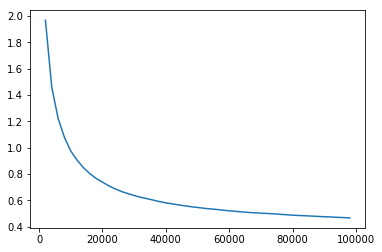

In [13]:
plt.plot(iterations,recordCost)
plt.show()

In [ ]:
""" ----- Cross Validation Results (20% of Data) ----- """

correct = 0
validationSize = 124800 - j
print(j,validationSize)
fiveCorrect = []
fiveWrong = []
while j < 124800:
    i = indices[j]
    X = np.append(trainX[i,:], 1) # (785,1) np array
    X = (X - np.mean(X))/np.std(X)
    label = np.argmax(trainY[i])
    output = np.argmax(NN.predict(X))
    #print(label,output,label-output)
    
    if label == output:
        correct += 1
        
        if len(fiveCorrect) < 5:
            fiveCorrect.append(trainX[i,:].reshape(28,28))
    else:
        if len(fiveWrong) < 5:
            fiveWrong.append(trainX[i,:].reshape(28,28))
        
    j += 1

endTime = time.time()
total_time = endTime-startTime

print("Validation Accuracy: " + str(correct/validationSize) + " | Training time (s): " + str(total_time))


In [ ]:
""" ----- More Training for Kaggle ----- """
NN.learningRate = 0.009
currEpoch = 0
while currEpoch < 300:
    print("\nCurrent Epoch: ",currEpoch)
    indices = range(0, 124800)
    indices = np.random.permutation(indices)

    j = 0
    cost = 0

    while j < 124800:
        i = indices[j]
        X = np.append(trainX[i,:], 1)
        X = (X - np.mean(X))/np.std(X)
        
        NN.trainNetwork(X, trainY[i])
        cost += NN.crossEntropyError(X, trainY[i])
        if j % 5000 == 0 and j != 0:
            print(cost / j)

        j += 1

    currEpoch += 1
    NN.learningRate = NN.learningRate*0.99

In [7]:
""" ----- Final Test Results ----- """
testX = newData['test_x']
k = 0
predLabels = []
while k < 20800:
    X = np.append(testX[k,:], 1) # (785,1) np array
    X = (X - np.mean(X))/np.std(X)
    output = np.argmax(NN.predict(X))
    predLabels.append(output)
    
    k += 1

In [8]:
""" ----- Save Predicted Labels (Kaggle) ----- """
i = 0
j = 1
with open('results.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Id,Category'])
    for label in predLabels:
        filewriter.writerow([str(j) + ',' + str(label+1)])
        i += 1
        j += 1

In [9]:
""" ----- Visualization (Problem 3) ----- """
print("5 Correct Results:")
for correctPred in fiveCorrect:
    plt.imshow(correctPred)
    plt.show()

5 Correct Results:


NameError: name 'fiveCorrect' is not defined

In [10]:
print("5 Wrong Results:")
for wrongPred in fiveWrong:
    plt.imshow(wrongPred)
    plt.show()

5 Wrong Results:


NameError: name 'fiveWrong' is not defined

In [11]:
print(NN.learningRate)

0.01


In [12]:
""" Training for"""

' Training for'